In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import pandas as pd
import os
from treys import Card
from termcolor import colored
from utils import eval_listof_games, debug_listof_games, save_results, load_results

# homemade stuff
from preprocessing import *
from evaluate_cards import *


processing img 0:
-- 0.320 seconds to load image
---- 1.471 seconds to register table
---- 0.495 seconds to equalize table
---- 0.408 seconds to extract players
---- 0.000 seconds to extract community cards
---- 0.000 seconds to extract chips
-- 2.374 seconds to segment image
---- 1.656 seconds to count community cards
---- 2.119 seconds to count player cards
---- 0.993 seconds to count chips
-- 4.768 seconds to evaluate image
7.672 seconds to process image 0


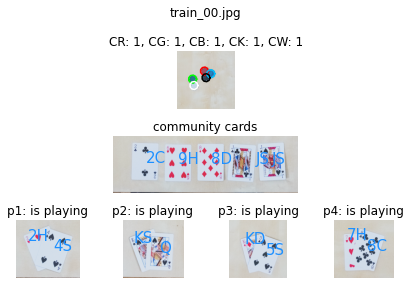

In [2]:
# demo of total program so far
for n in [0] : 
    start_time = time.time()
    print("\nprocessing img %d:" % n)

    tic = time.time()
    img =  get_img(n)[::2,::2,:]
    print("-- %.3f seconds to load image" % (time.time() - tic))

    tic = time.time()
    segments = TableSegments(img)
    print("-- %.3f seconds to segment image" % (time.time() - tic))

    tic = time.time()
    segments.evaluate()
    print("-- %.3f seconds to evaluate image" % (time.time() - tic))

    segments.show("train_{}.jpg".format(str(n).zfill(2)))

    print("%.3f seconds to process image %d" % (time.time() - start_time, n))

    plt.show()

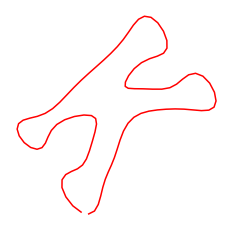

In [2]:
# demo : extract the average contour for a certain card value
card='K'
nb_descr = 30
avg_descr, avg_cont = make_avg_descr(card, nb_descr, make_contour=True)
for char in card : 
    plt.plot(avg_cont[char][:,1], -avg_cont[char][:,0], 'r')
plt.axis('image')
plt.axis('off')
plt.show()

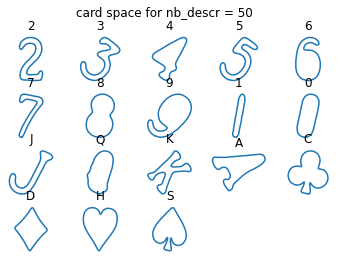

In [3]:
# make the "card space"

nb_descr = 50
card_space = make_card_space(nb_descr=nb_descr)

show_card_space(card_space)
plt.show()

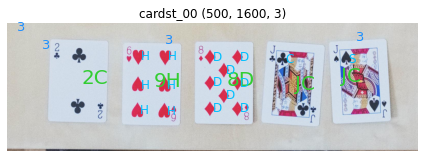

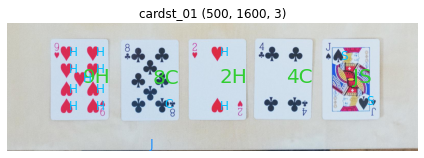

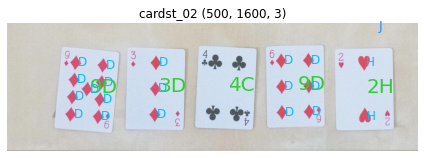

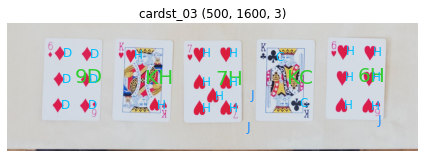

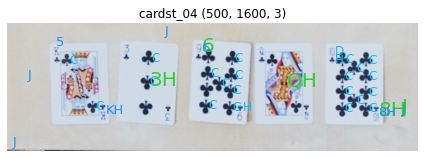

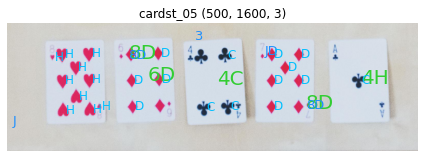

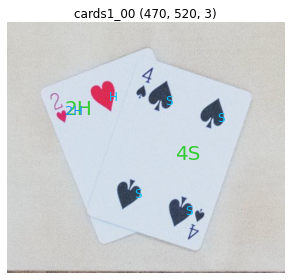

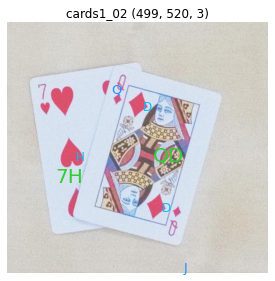

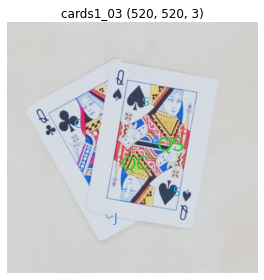

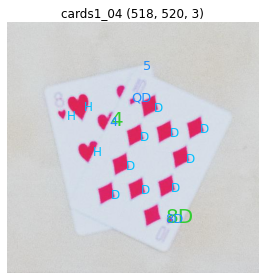

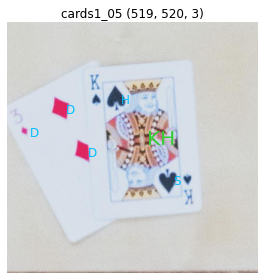

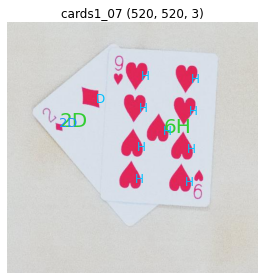

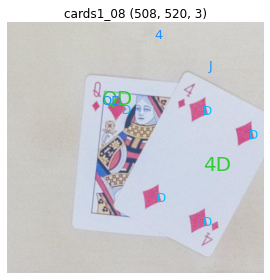

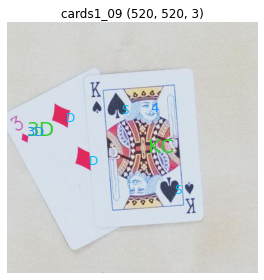

In [5]:
#evaluate the cards in a given list

cards_list = range(6) 
cards_name = 'cardst'
for n in cards_list :
    img = get_img(n, cards_name)

    # print results
    guess_cards(img, card_space, nb_cards=5, disp=True, title="{}_{}".format(cards_name, str(n).zfill(2)))
    plt.show()

cards_list = [0, 2, 3, 4, 5, 7, 8, 9]
cards_name = 'cards1'
for n in cards_list :
    img = get_img(n, cards_name)

    # print results
    guess_cards(img, card_space, nb_cards=2, disp=True, title="{}_{}".format(cards_name, str(n).zfill(2)))
    plt.show()
    